theta_best: [[4.21509616]
 [2.77011339]]
init theta: [[1]
 [0]]


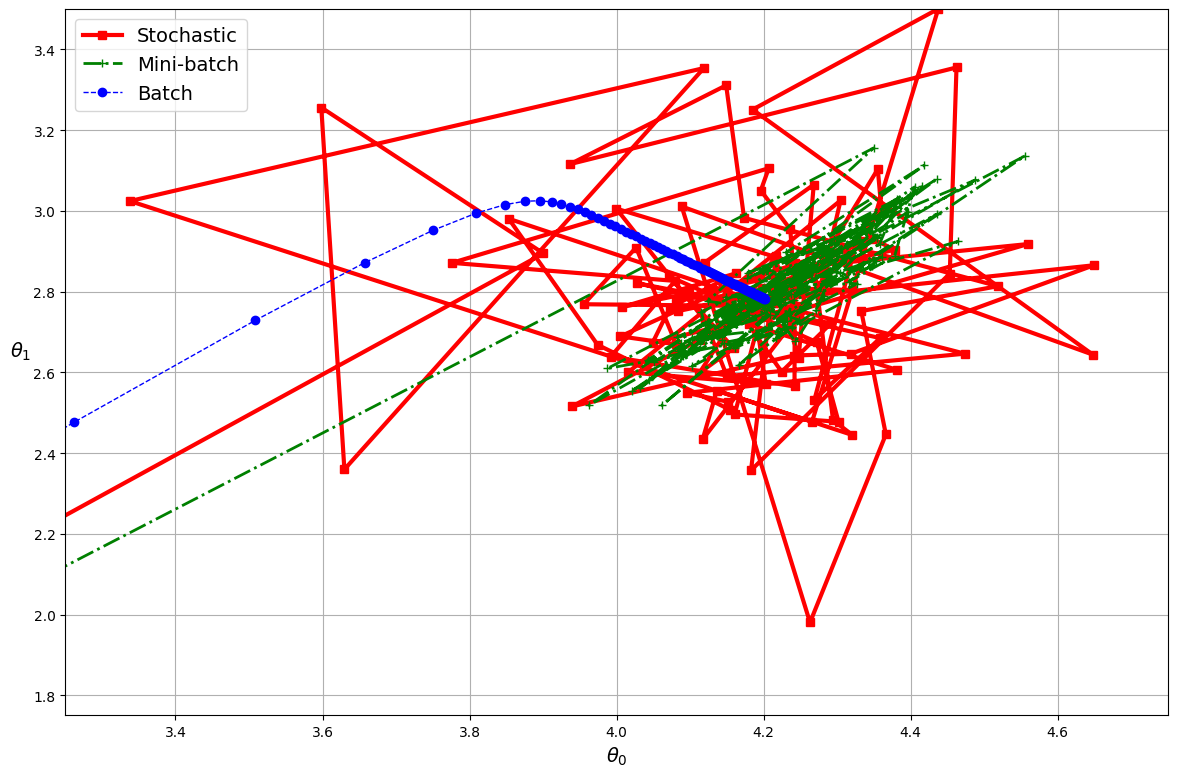

In [1]:
# extra code – this cell generates and saves Figure 4–11
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

''' 資料~ '''
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

'''
plt.figure(figsize=(10, 8))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.tight_layout()
#plt.show()
'''

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(f'theta_best: {theta_best}')

from math import ceil

n_epochs = 100
minibatch_size = 10
n_batches_per_epoch = ceil(m / minibatch_size)
t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

eta = 0.1
def batch_gradient_descent(theta):
    theta_path_bgd = [theta]
    for _ in range(n_epochs):
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path_bgd.append(theta)
    return theta_path_bgd


def stochastic_gradient_descent(theta):
    theta_path_sgd = [theta]
    for epoch in range(n_epochs):
        for iteration in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]
            gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
            eta = learning_schedule(epoch * m + iteration)
            theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure
    return theta_path_sgd

def mini_gradient_descent(theta):
    theta_path_mgd = [theta]
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for iteration in range(0, n_batches_per_epoch):
            idx = iteration * minibatch_size
            xi = X_b_shuffled[idx : idx + minibatch_size]
            yi = y_shuffled[idx : idx + minibatch_size]
            gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
            eta = learning_schedule(iteration)
            theta = theta - eta * gradients
        theta_path_mgd.append(theta)
    return theta_path_mgd

np.random.seed(42)
#theta = np.random.randn(2, 1)
theta = np.array([[1], [0]])  # random initialization
print(f'init theta: {theta}')
theta_path_bgd = np.array(batch_gradient_descent(theta))
theta_path_sgd = np.array(stochastic_gradient_descent(theta))
theta_path_mgd = np.array(mini_gradient_descent(theta))

plt.figure(figsize=(12, 8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=3, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-.+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b--o", linewidth=1,label="Batch")

plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([3.25, 4.75, 1.75, 3.5])
plt.grid()
plt.tight_layout()
plt.show()